In [1]:
from numpy import argmax

from data.load import load_train_data, load_test_data
from model.convolutional import build_compile_fit, reshape_input
from reporting.evaluation import plot_confusion_matrix
from reporting.images import display_dataframe
from pandas import DataFrame, concat

In [2]:
x_train, y_train = load_train_data()
x_test, y_test = load_test_data()

x_train_reshaped, y_train_reshaped = reshape_input(x_train, y_train)
x_test_reshaped, y_test_reshaped = reshape_input(x_test, y_test)

In [3]:
model = build_compile_fit(x_train_reshaped, y_train_reshaped)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9275 - accuracy: 0.8398

In [9]:
compare_items = 100
prediction = [argmax(x) for x in model.predict(x_test_reshaped[:compare_items])]
expectation = y_test_reshaped[:compare_items]
comparison = concat([DataFrame(prediction, columns=['Prediction']), expectation.rename('Actual')], axis=1)

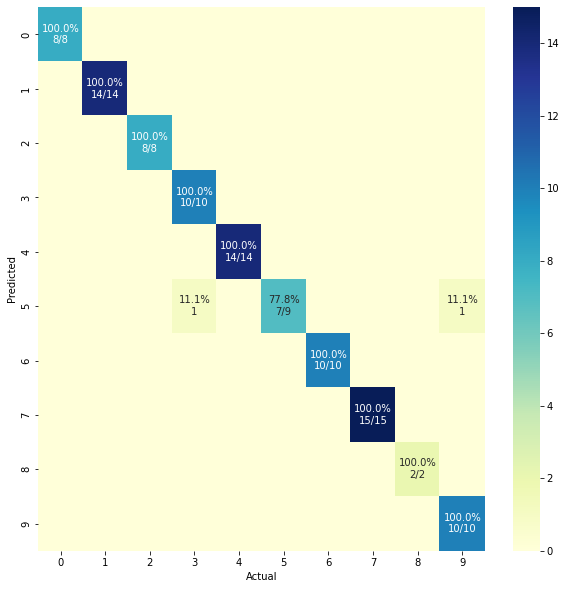

In [10]:
plot_confusion_matrix(prediction, expectation)

# Mismatches

The following items did not match the expectation.

In [6]:
missmatch = comparison[comparison.prediction != comparison.label]
missmatch

,prediction,label
18,5,3
62,5,9


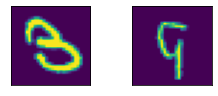

In [7]:
display_dataframe(x_test.iloc[missmatch.index])


